# Case Study #07- Supervised Learning

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Q1. Read the data set to the Python Environment

In [8]:
data = pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
data.shape

(150, 5)

In [10]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
#  Classification is our target varible
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [13]:
#Lets check the Percentage of each of above
data['Classification'].value_counts('normalized=True')

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [ ]:
# Normalized data 33% each; i.e. balanced data

# Q2. Preprocessing

Data Cleaning

In [14]:
# check for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Missing values in SL, SW,PL

In [15]:
# Checking data types
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

Classification is object and others are float type

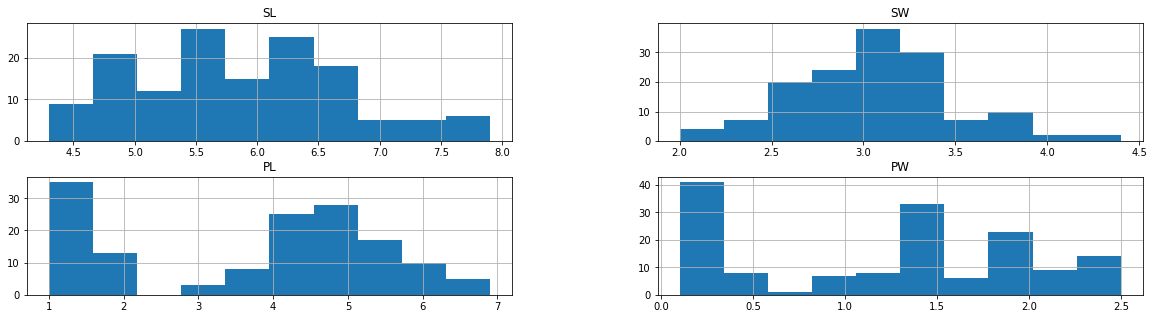

In [16]:
frqgraph = data.select_dtypes(include=['float'])
frqgraph.hist(figsize =(20,5))
plt.show()

In [17]:
# skewed data; lets use median
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [18]:
# filling missing values
for i in ['SL', 'SW', 'PL', 'PW']:
    data[i] = data[i].fillna(data[i].median())
# check again for missing values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now there is no missing values ; Completed our Preprocessing of data

Training and Test Data Spliting

In [19]:
# split data into features and target
# Classification is 'y' ,all others are 'x'
# split the dataset
x = data.drop(['Classification'],axis=1)
y = data['Classification']
# print x
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [20]:
# print y
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42, test_size =0.2)
# datapoints in training sets
x_train.shape

(120, 4)

120 for training, 30 for testing

Standarzing the features (Data Normalisation)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train.shape

(120, 4)

data scaled using standard scale

# Q3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
# fitting to x train and y train 
logit_model.fit(x_train,y_train)

LogisticRegression()

Predict on Test Set

In [24]:
y_pred = logit_model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Measuring Accuracy

In [25]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.9666666666666667


Therefore predicted accuracy 96.6%

In [26]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

KNN Regression

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# finding optimal k value
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors =k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667]

Text(0, 0.5, 'accuracy')

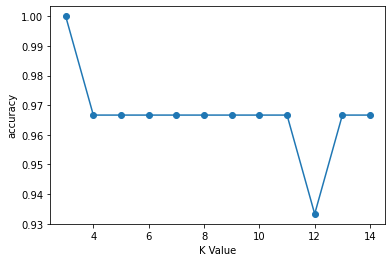

In [28]:
# check for which k value , we get highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [29]:
classifier =KNeighborsClassifier(n_neighbors = 3, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

Measuring Accurancy for KNN

In [ ]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is 100 % at k=3

In [30]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [31]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

Predicting and Measuring Accuracy for Decision Tree

In [33]:
y_pred=dt_model.predict(x_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.9666666666666667


Accuracy is 96.6 %

In [34]:
y_test.value_counts()

Iris-virginica     11
Iris-setosa        10
Iris-versicolor     9
Name: Classification, dtype: int64

In [35]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

# SVM

Linear SVM

In [36]:
from sklearn.svm import SVC
svm_linear = SVC(kernel ='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

Predicting

In [37]:
y_pred =svm_linear.predict(x_test)

Measuring Accuracy

In [38]:
print('Accuracy using linear svm is: ',accuracy_score(y_test,y_pred))

Accuracy using linear svm is:  0.9333333333333333


Accuracy is 93.3%

# Random Forest

In [40]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred=clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


Accuracy is 96.6%

We can conclude That 100% Accuracy at KNN Model